In [1]:
# Wharton WHL Competition - Week 1 Data Exploration
# Team: Francis, Sharvil, Kevin, Anuj, Karan
# Date: Feb 2026

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fix working directory to repo root
os.chdir("..")
print("✅ Working directory:", os.getcwd())

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("✅ Environment ready!")
print(f"pandas version: {pd.__version__}")


✅ Working directory: /workspaces/wharton-data-science-comp
✅ Environment ready!
pandas version: 2.3.3


In [2]:
# Load the main WHL dataset
csv_path = "/workspaces/wharton-data-science-comp/data/raw/whl_2025.csv"
df = pd.read_csv(csv_path)

print("✅ Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns ({len(df.columns)} total):")
print(df.columns.tolist())
print("\nFirst 3 rows:")
df.head(3)

✅ Data loaded successfully!
Shape: (25827, 26)
Columns (26 total):
['game_id', 'record_id', 'home_team', 'away_team', 'went_ot', 'home_off_line', 'home_def_pairing', 'away_off_line', 'away_def_pairing', 'home_goalie', 'away_goalie', 'toi', 'home_assists', 'home_shots', 'home_xg', 'home_max_xg', 'home_goals', 'away_assists', 'away_shots', 'away_xg', 'away_max_xg', 'away_goals', 'home_penalties_committed', 'home_penalty_minutes', 'away_penalties_committed', 'away_penalty_minutes']

First 3 rows:


,game_id,record_id,home_team,away_team,went_ot,home_off_line,home_def_pairing,away_off_line,away_def_pairing,home_goalie,...,home_goals,away_assists,away_shots,away_xg,away_max_xg,away_goals,home_penalties_committed,home_penalty_minutes,away_penalties_committed,away_penalty_minutes
0,game_1,record_1,thailand,pakistan,0,PP_kill_dwn,PP_kill_dwn,PP_up,PP_up,player_id_142,...,0,2,9,1.4645,0.2166,1,7,14,1,2
1,game_1,record_2,thailand,pakistan,0,second_off,second_def,second_off,second_def,player_id_142,...,0,2,1,0.0928,0.0928,1,0,0,0,0
2,game_1,record_3,thailand,pakistan,0,first_off,second_def,second_off,second_def,player_id_142,...,0,0,2,0.1880,0.0940,0,0,0,0,0


In [3]:
# Robust dataset summary (handles missing columns)
print("=== BASIC DATASET OVERVIEW ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

print("\n=== UNIQUE VALUES ===")
print("Unique game_ids:", df['game_id'].nunique())
print("Unique home_teams:", df['home_team'].nunique())
print("Unique away_teams:", df['away_team'].nunique())

# Check common columns
off_lines = ['home_off_line', 'away_off_line']
def_lines = ['home_def_line', 'away_def_line']

for col in off_lines:
    if col in df.columns:
        print(f"Unique {col}:", df[col].nunique())
    else:
        print(f"{col}: Missing")

for col in def_lines:
    if col in df.columns:
        print(f"Unique {col}:", df[col].nunique())
    else:
        print(f"{col}: Missing")

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== DATA TYPES (first 10) ===")
print(df.dtypes.head(10))


=== BASIC DATASET OVERVIEW ===
Total rows: 25827
Total columns: 26

=== UNIQUE VALUES ===
Unique game_ids: 1312
Unique home_teams: 32
Unique away_teams: 32
Unique home_off_line: 5
Unique away_off_line: 5
home_def_line: Missing
away_def_line: Missing

=== MISSING VALUES ===
game_id                     0
record_id                   0
home_team                   0
away_team                   0
went_ot                     0
home_off_line               0
home_def_pairing            0
away_off_line               0
away_def_pairing            0
home_goalie                 0
away_goalie                 0
toi                         0
home_assists                0
home_shots                  0
home_xg                     0
home_max_xg                 0
home_goals                  0
away_assists                0
away_shots                  0
away_xg                     0
away_max_xg                 0
away_goals                  0
home_penalties_committed    0
home_penalty_minutes        0
away_p

In [4]:
# Look at game_1 in detail (first game)
game_1 = df[df['game_id'] == 'game_1']
print("=== GAME 1 BREAKDOWN ===")
print(f"Rows for game_1: {len(game_1)}")
print("\nKey columns for game_1:")
cols_to_show = ['game_id', 'home_team', 'away_team', 'home_off_line', 'toi', 'home_xg', 'away_xg']
game_1[cols_to_show].head(10)


=== GAME 1 BREAKDOWN ===
Rows for game_1: 22

Key columns for game_1:


,game_id,home_team,away_team,home_off_line,toi,home_xg,away_xg
0,game_1,thailand,pakistan,PP_kill_dwn,628.80,0.1754,1.4645
1,game_1,thailand,pakistan,second_off,197.61,0.0000,0.0928
2,game_1,thailand,pakistan,first_off,47.06,0.0000,0.1880
3,game_1,thailand,pakistan,second_off,44.60,0.1211,0.0727
4,game_1,thailand,pakistan,second_off,274.65,0.1207,0.0769
5,game_1,thailand,pakistan,empty_net_line,4.05,0.0000,0.0000
6,game_1,thailand,pakistan,first_off,170.49,0.0000,0.0928
7,game_1,thailand,pakistan,empty_net_line,20.20,0.0000,0.0000
8,game_1,thailand,pakistan,first_off,117.12,0.1104,0.0806
9,game_1,thailand,pakistan,second_off,122.35,0.1187,0.0000


In [5]:
# Count total games per team (home + away)
team_games = {}

for team in set(df['home_team'].tolist() + df['away_team'].tolist()):
    home_games = len(df[df['home_team'] == team])
    away_games = len(df[df['away_team'] == team])
    total_games = home_games + away_games
    team_games[team] = total_games

team_df = pd.DataFrame(list(team_games.items()), columns=['team', 'total_games'])
team_df = team_df.sort_values('total_games', ascending=False).reset_index(drop=True)

print("=== TOP 10 TEAMS BY TOTAL GAMES ===")
team_df.head(10)


=== TOP 10 TEAMS BY TOTAL GAMES ===


,team,total_games
0,france,1660
1,iceland,1642
2,thailand,1642
3,new_zealand,1641
4,saudi_arabia,1638
5,uk,1631
6,vietnam,1625
7,rwanda,1622
8,serbia,1622
9,uae,1620


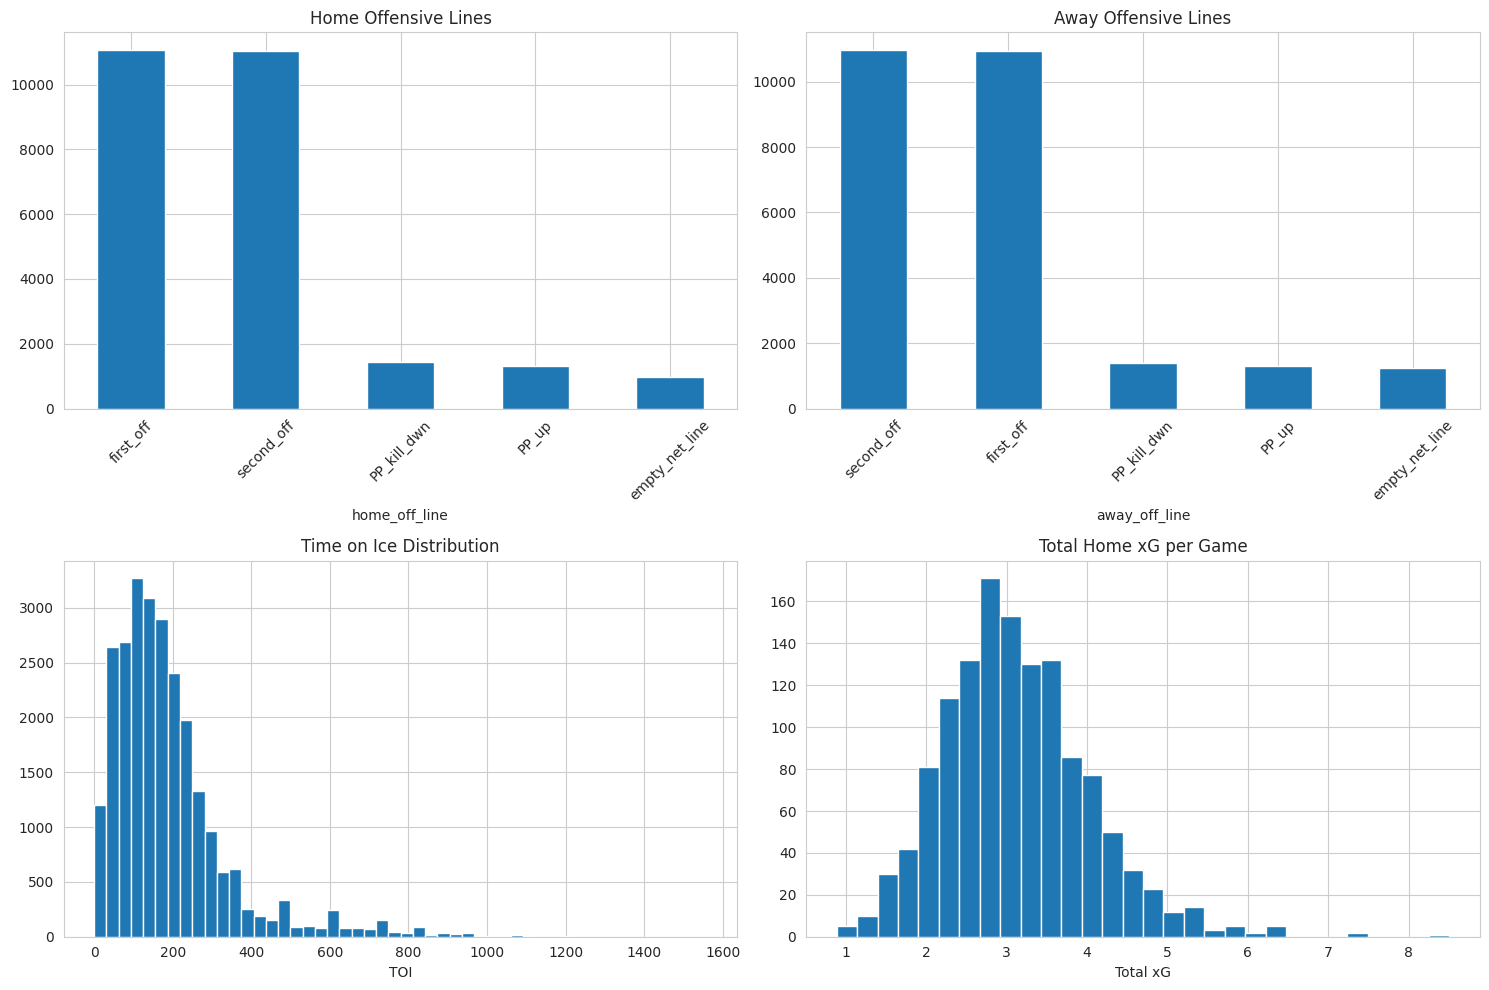

In [6]:
# Show distribution of line types
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Home offensive lines
if 'home_off_line' in df.columns:
    df['home_off_line'].value_counts().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title("Home Offensive Lines")
    axes[0,0].tick_params(axis='x', rotation=45)

# Away offensive lines
if 'away_off_line' in df.columns:
    df['away_off_line'].value_counts().plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title("Away Offensive Lines")
    axes[0,1].tick_params(axis='x', rotation=45)

# TOI distribution
df['toi'].hist(bins=50, ax=axes[1,0])
axes[1,0].set_title("Time on Ice Distribution")
axes[1,0].set_xlabel("TOI")

# xG per game (sample)
if 'home_xg' in df.columns:
    df.groupby('game_id')['home_xg'].sum().hist(bins=30, ax=axes[1,1])
    axes[1,1].set_title("Total Home xG per Game")
    axes[1,1].set_xlabel("Total xG")

plt.tight_layout()
plt.show()


In [7]:
# Create and save dataset summary
dataset_summary = {
    'total_rows': len(df),
    'total_columns': len(df.columns),
    'unique_games': df['game_id'].nunique(),
    'unique_teams': len(team_df),
    'rows_per_game_avg': round(len(df) / df['game_id'].nunique(), 1),
    'missing_values_total': int(df.isnull().sum().sum()),
    'toi_min': df['toi'].min(),
    'toi_max': df['toi'].max(),
    'home_xg_mean': round(df['home_xg'].mean(), 3) if 'home_xg' in df.columns else 'N/A'
}

summary_df = pd.DataFrame([dataset_summary])
summary_df.to_csv("/workspaces/wharton-data-science-comp/outputs/dataset_summary.csv", index=False)

print("✅ Dataset summary saved to outputs/dataset_summary.csv")
print("\nSummary:")
for key, value in dataset_summary.items():
    print(f"{key}: {value}")

✅ Dataset summary saved to outputs/dataset_summary.csv

Summary:
total_rows: 25827
total_columns: 26
unique_games: 1312
unique_teams: 32
rows_per_game_avg: 19.7
missing_values_total: 0
toi_min: 0.01
toi_max: 1559.67
home_xg_mean: 0.159
